In [ ]:
print(installed.packages())

## Notebook for developing a deep learning classification model of NIR spectra for peanut

1. installation of the packages
2. loading packages 
3. 

 

In [ ]:
install.packages('tensorflow')
install.packages('keras')
install.packages('caret')

chercher! 


In [ ]:
library(caret)
library(tensorflow)
library(keras)
library(tidyverse)
library(readxl)

In [7]:
data=read.csv("/content/tf_datasets.csv")

In [ ]:

head(data)

In [ ]:
head(df,5)

In [ ]:
str(data)
length(data)
indx<-c(3:length(data))
length(indx)
# indx<-c(4,7,11,12,14)
# names(data)[indx]

data[,indx]<-lapply(data[,indx], scale)


In [11]:
### Data formatting
nn_dat = data %>%
  as_tibble %>%
  mutate(class_num    = as.numeric(as.factor(types)) - 1,
         class_label  = as.factor(types)) 
nn_dat %>% head(3)



X,types,genotype,X11528,X11520,X11512,X11504,X11496,X11488,X11480,⋯,X4008,X4000,X3992,X3984,X3976,X3968,X3960,X3952,class_num,class_label
<int>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<fct>
1,Core Rouge,0.726202,-0.8020994,-0.7989018,-0.7865938,-0.7751283,-0.7692176,-0.7676273,-0.7700277,⋯,-0.25791048,-0.26603063,-0.27370874,-0.28092339,-0.28970627,-0.29979507,-0.30975935,-0.31902282,3,Core Rouge
2,Core Rouge,0.726202,-0.8111267,-0.8027480,-0.7954751,-0.7989633,-0.8109163,-0.8229301,-0.8270512,⋯,-0.30730766,-0.31627256,-0.32603651,-0.33626752,-0.34726289,-0.35926931,-0.37128380,-0.38302615,3,Core Rouge
3,Core Rouge,0.726202,-0.8869402,-0.8926391,-0.8848375,-0.8745967,-0.8683244,-0.8671723,-0.8746949,⋯,-0.02460409,-0.03118209,-0.04079576,-0.05207408,-0.06461813,-0.07662643,-0.08689322,-0.09711541,3,Core Rouge



   0    1    2    3 
 781  744  855 1749 


   AB QTL Bafia AB QTL Mbalmayo    AB QTL Nioro      Core Rouge 
            781             744             855            1749 

In [60]:
table(nn_dat$class_num)


   0    1    2    3 
 781  744  855 1749 

In [61]:
table(nn_dat$class_label)


   AB QTL Bafia AB QTL Mbalmayo    AB QTL Nioro      Core Rouge 
            781             744             855            1749 

In [71]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }


In [12]:


set.seed(123)
test_f = 0.30
nn_dat = nn_dat %>%
  mutate(partition = sample(c('train','test'), nrow(.), replace = TRUE, prob = c(1 - test_f, test_f)))


x_train = nn_dat %>% dplyr::filter(partition == 'train') %>% dplyr::select(all_of(indx)) %>% as.matrix
y_train = nn_dat %>% dplyr::filter(partition == 'train') %>% pull(class_num) %>% to_categorical(4)
x_test  = nn_dat %>% dplyr::filter(partition == 'test')  %>% dplyr::select(all_of(indx)) %>% as.matrix
y_test  = nn_dat %>% dplyr::filter(partition == 'test')  %>% pull(class_num) %>% to_categorical(4)


In [ ]:
### Model architecture 

FLAGS <- flags(
  flag_numeric("dropout1", 0.30),
  flag_numeric("dropout2", 0.30)
)

input.shape<-length(indx)
input.shape




# init --------------------------------------------------------------------

In [84]:

build_model<-function(){
  
  model<-keras_model_sequential() %>%  
    layer_dense(units = 300,activation = 'relu', input_shape = input.shape) %>% 
    layer_batch_normalization() %>% 
    layer_dropout(FLAGS$dropout1) %>% 
    
    layer_dense(units = 200,activation = 'relu') %>%  
    layer_batch_normalization() %>% 
    layer_dropout(FLAGS$dropout1) %>% 
    
    layer_dense(units = 100,activation = 'relu') %>% 
    layer_batch_normalization() %>% 
    layer_dropout(FLAGS$dropout2) %>% 
    
    layer_dense(units = 100,activation = 'relu') %>%
    layer_batch_normalization() %>% 
    
    layer_dense(units = 4, activation = 'softmax')
  
  model %>% compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics='accuracy'
  )
  
  
}



In [14]:
# list('accuracy', 
#      metric_true_negatives(),
#      metric_true_positives(),
#      metric_false_positives(),
#      metric_false_negatives())
model<-build_model()



In [85]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 dense_4 (Dense)               (None, 300)                285000     Y          
 batch_normalization_3 (BatchN  (None, 300)               1200       Y          
 ormalization)                                                                  
 dropout_2 (Dropout)           (None, 300)                0          Y          
 dense_3 (Dense)               (None, 200)                60200      Y          
 batch_normalization_2 (BatchN  (None, 200)               800        Y          
 ormalization)                                                                  
 dropout_1 (Dropout)           (None, 200)                0          Y          
 dense_2 (Dense)               (None, 100)                20100      Y          
 batch_normalization_1 (BatchN  (None, 100)               400        Y          
 ormaliz

In [86]:
history<-model %>% 
  fit(x = x_train,y = y_train,epochs= 70,batch_size= 600, verbose = 1)


In [ ]:
y_pred <- model %>% 
  predict(x_test) %>%round(0)

y_pred <-round(y_pred ,0)

pred_df<-as.data.frame(y_pred,y_test)

conf1<-caret::confusionMatrix(table(y_pred,y_test))
conf2<-caret::confusionMatrix(table(y_pred,y_test), mode = "prec_recall")


## Classification Resuluts 

In [90]:

conf2

Confusion Matrix and Statistics

      y_test
y_pred    0    1
     0 3736   12
     1   11 1237
                                          
               Accuracy : 0.9954          
                 95% CI : (0.9931, 0.9971)
    No Information Rate : 0.75            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9877          
                                          
 Mcnemar's Test P-Value : 1               
                                          
              Precision : 0.9968          
                 Recall : 0.9971          
                     F1 : 0.9969          
             Prevalence : 0.7500          
         Detection Rate : 0.7478          
   Detection Prevalence : 0.7502          
      Balanced Accuracy : 0.9937          
                                          
       'Positive' Class : 0               
                                          

In [91]:
xx<-model %>% 
  predict(x_test) %>% 
  k_argmax()

xx<-as.numeric(xx)

In [95]:

plot_dat = nn_dat %>% filter(partition == 'test') %>%
  mutate(class_num = factor(class_num),
         y_pred    = factor(xx),
         Correct   = factor(ifelse(class_num == y_pred, "Yes", "No")))
class(plot_dat)
names(plot_dat)[c(2:3)]


[1] "tbl_df"     "tbl"        "data.frame"

[1] "types"    "genotype"

In [96]:
perf = model %>% evaluate(x_test, y_test)
print(perf)

     loss  accuracy 
0.0353821 0.9911929 


In [72]:
 fig(23,16)

In [97]:
 
title     = "Classification Performance of Artificial Neural Network"
sub_title = paste0(round(perf[2],3)*100 , '%')
x_lab     = "True Genotype class"
y_lab     = "Predicted Genotype class"

# Visualization Parameters

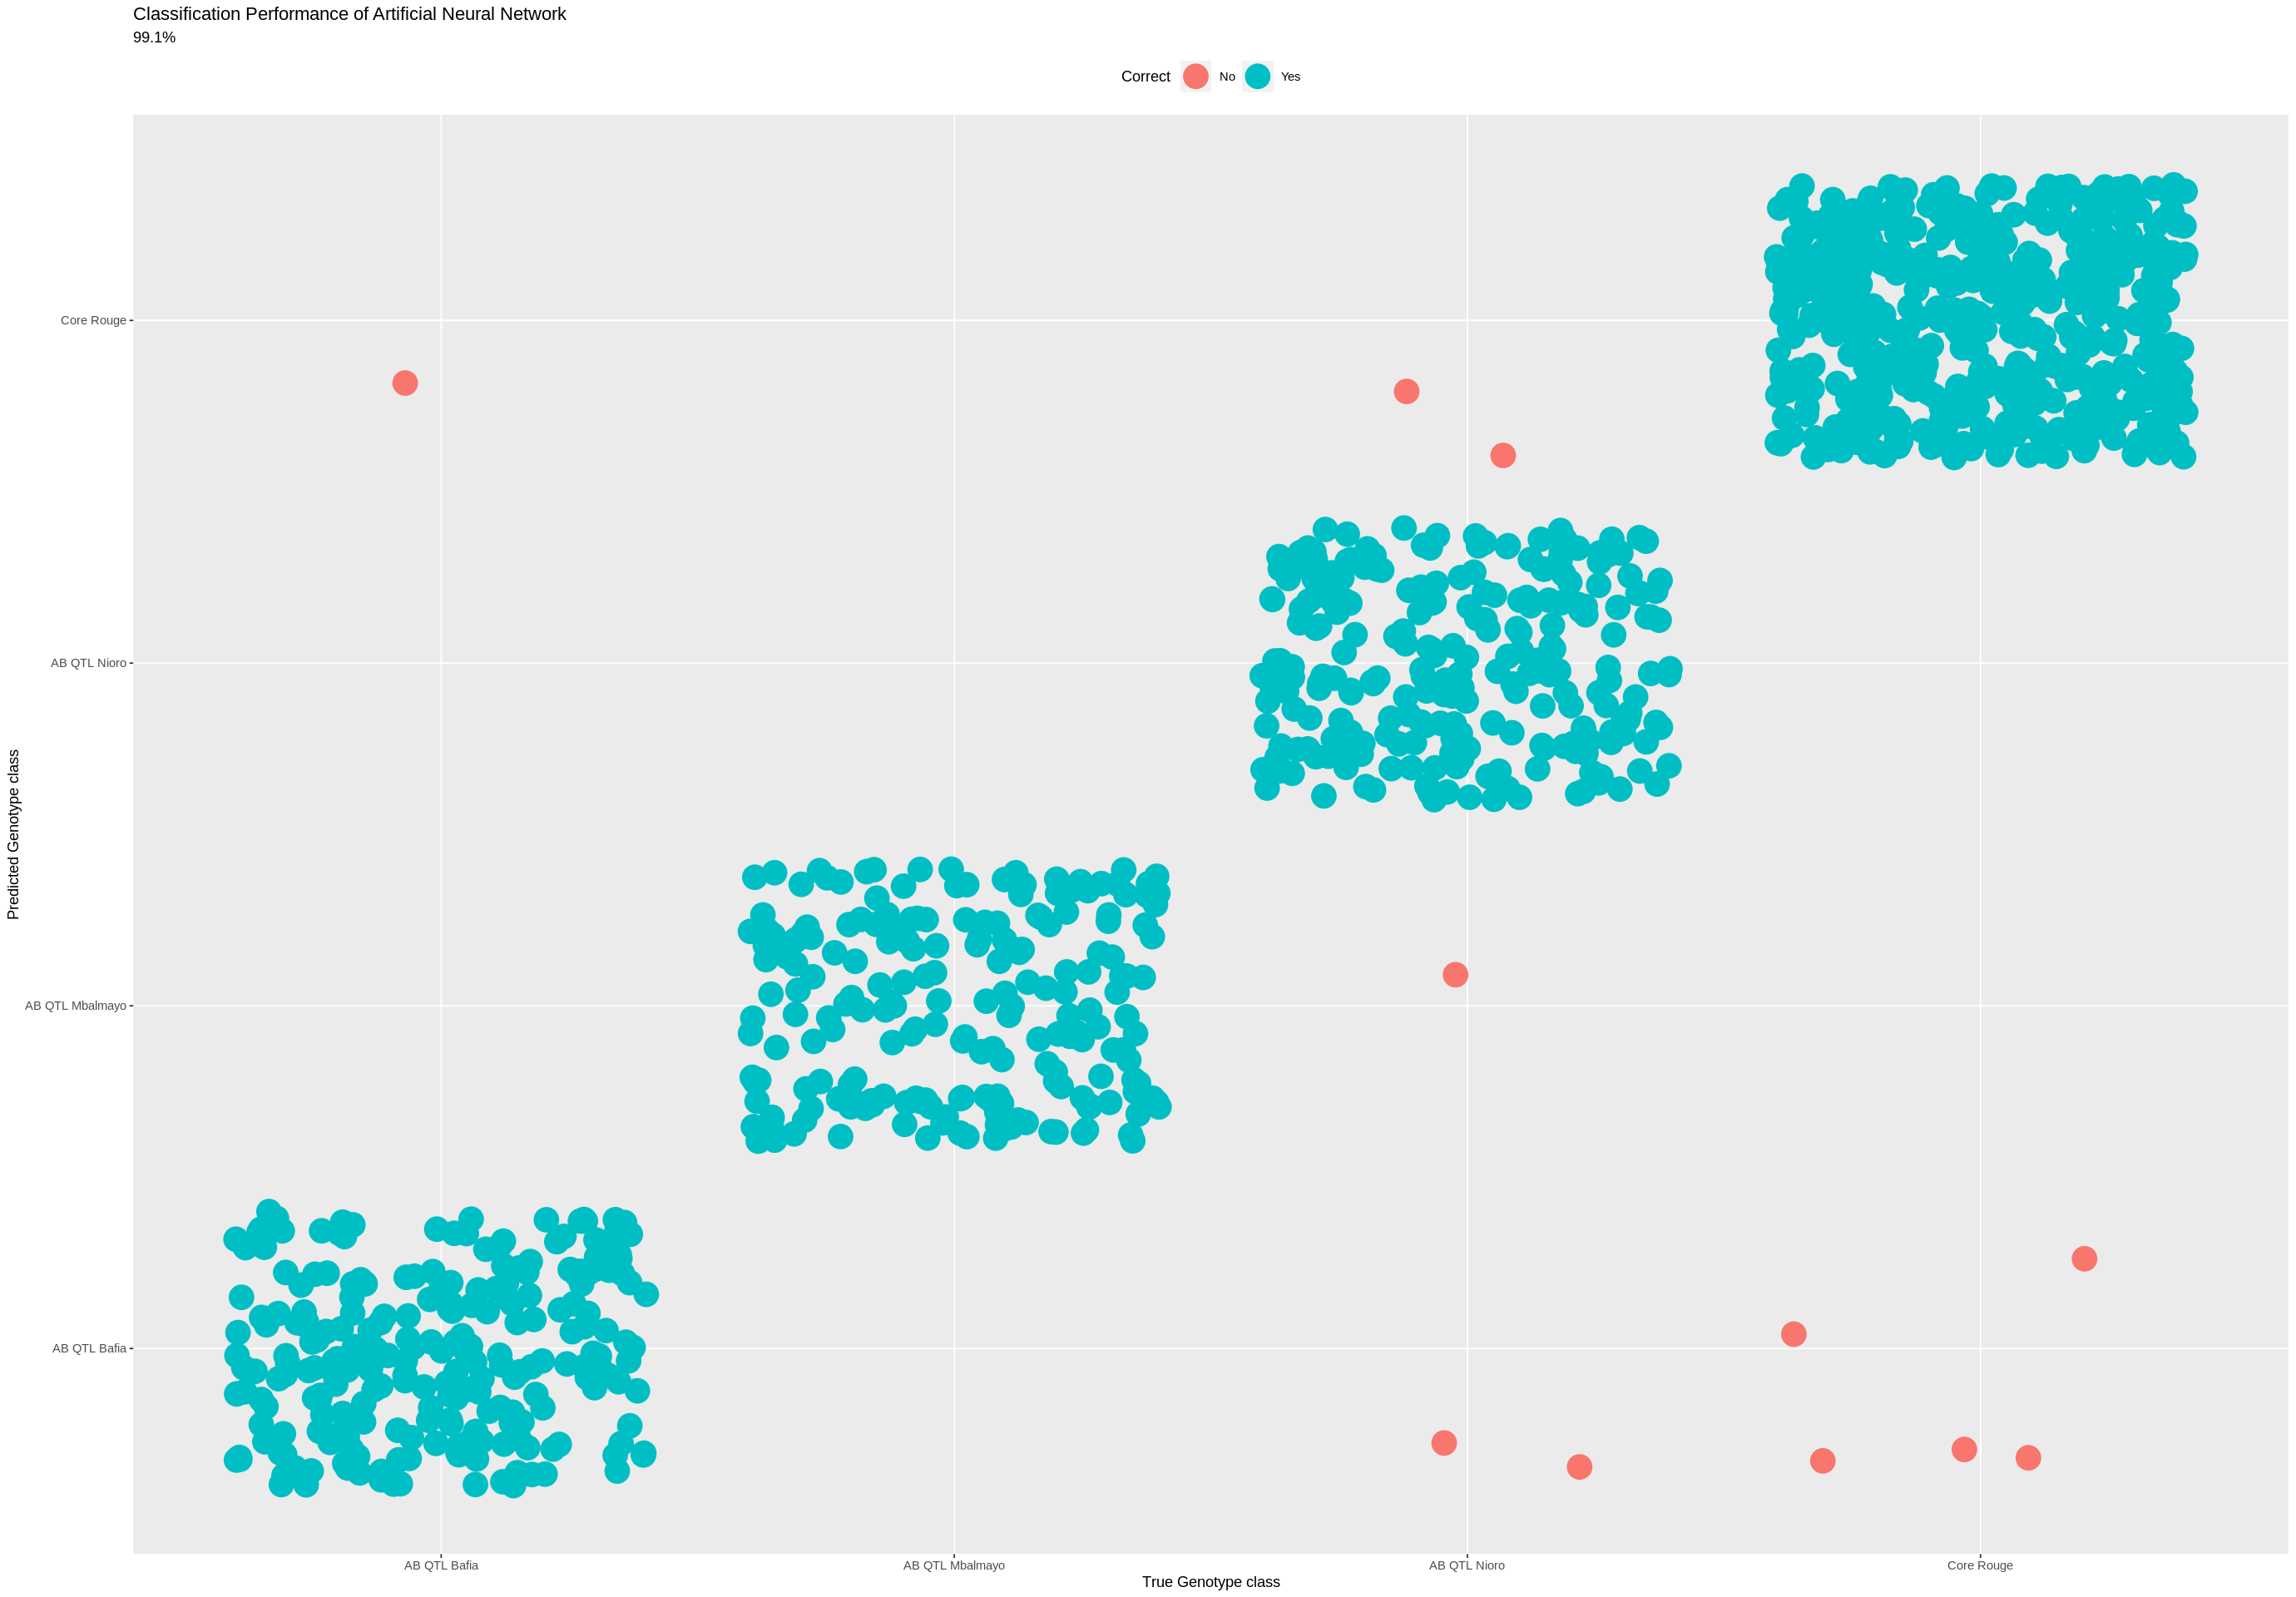

In [98]:
plot_dat %>% ggplot(aes(x = class_num, y = y_pred, colour = Correct)) +
  geom_jitter(size=8) +
  scale_x_discrete(labels = levels(nn_dat$class_label)) +
  scale_y_discrete(labels = levels(nn_dat$class_label)) +
  theme(legend.position ='top')+
  labs(title = title, subtitle = sub_title, x = x_lab, y = y_lab)
